<h1 style="font-size:36px; line-height:1.5; padding:10px;">
<b>Exploring AI/ML Career Potential: Unveiling Salary Insights through EDA and Machine Learning</b>
</h>

# **Problem Statement**

<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>In this project, we aim to analyze salary trends for professionals working in the AI/ML fields using a dataset provided by Ai-jobs, which includes over 18,000 salary data points. The analysis will focus on providing insights based on the following investigative questions:</b>
</h>

- #### **What are the top 10 job titles with the highest average salaries in the AI/ML fields in the US?**

- #### **What trends can be observed in the fluctuations of average salaries in the US during the period from 2020 to 2024?**

- #### **How do salaries vary across different locations during 2020 to 2024?**

- #### **What is the salary range for various experience levels in the United States in 2024?**

# **Practical Application**

<h1 style="font-size:20px; line-height:1.5; padding:10px;">
<b>These insights will help professionals, hiring managers, and companies make more informed decisions regarding career choices, recruitment, and salary negotiations.</b>
</h>

## **Import packages and load data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = pd.read_csv('salaries.csv')
data.head()

work_year experience_level employment_type           job_title  salary  \
0       2024               MI              FT  Analytics Engineer   77500   
1       2024               SE              FT        AI Developer  252000   
2       2024               SE              FT        AI Developer  168000   
3       2024               MI              FT      Data Scientist  199500   
4       2024               MI              FT      Data Scientist   86700   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             CAD          59615                 CA           100   
1             USD         252000                 US             0   
2             USD         168000                 US             0   
3             USD         199500                 US           100   
4             USD          86700                 US           100   

  company_location company_size  
0               CA            S  
1               US            M  
2               US            M  
3               US            M  
4               US            M

## **Initial Data Observation**

In [2]:
print("Data Shape:", data.shape)
print("\n")
print(data.info())
print("\n")
missing_values = data.isnull().sum()
print("Missing value")
print(missing_values)
print("\n")
has_duplicates = data.duplicated().any()  
print("Are there duplicate entries?：", has_duplicates)

Data Shape: (18056, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18056 entries, 0 to 18055
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           18056 non-null  int64 
 1   experience_level    18056 non-null  object
 2   employment_type     18056 non-null  object
 3   job_title           18056 non-null  object
 4   salary              18056 non-null  int64 
 5   salary_currency     18056 non-null  object
 6   salary_in_usd       18056 non-null  int64 
 7   employee_residence  18056 non-null  object
 8   remote_ratio        18056 non-null  int64 
 9   company_location    18056 non-null  object
 10  company_size        18056 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.5+ MB
None


Missing value
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
em

## **Initial Data cleaning**

In [3]:
data = data.drop_duplicates()
print("Are there duplicate entries?：", data.duplicated().any())
print("\n")
print("Data Shape:", data.shape)
print("\n")
print(data.nunique())

Are there duplicate entries?： False


Data Shape: (10676, 11)


work_year                5
experience_level         4
employment_type          4
job_title              143
salary                2761
salary_currency         24
salary_in_usd         3149
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64


## **Mapping dictionary**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Some of the column names are abbreviated, which makes them difficult to understand, so we will change them to their full names.</b>
</h4>

In [4]:
data['experience_level'] = data['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

data['employment_type'] = data['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT': 'Full-time',
    'PT': 'Part-time'
})

data['remote_ratio'] = data['remote_ratio'].replace({
    0: 'On-Site',
    50: 'Half-Remote',
    100: 'Full-Remote',
})

data['company_size'] = data['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L': 'LARGE',
})

data.head()

work_year        experience_level employment_type           job_title  \
0       2024  Mid/Intermediate level       Full-time  Analytics Engineer   
1       2024                  Senior       Full-time        AI Developer   
2       2024                  Senior       Full-time        AI Developer   
3       2024  Mid/Intermediate level       Full-time      Data Scientist   
4       2024  Mid/Intermediate level       Full-time      Data Scientist   

   salary salary_currency  salary_in_usd employee_residence remote_ratio  \
0   77500             CAD          59615                 CA  Full-Remote   
1  252000             USD         252000                 US      On-Site   
2  168000             USD         168000                 US      On-Site   
3  199500             USD         199500                 US  Full-Remote   
4   86700             USD          86700                 US  Full-Remote   

  company_location company_size  
0               CA        SMALL  
1               US       MEDIUM  
2               US       MEDIUM  
3               US       MEDIUM  
4               US       MEDIUM

## **RECAP**

- #### **The dataset contains** **18,056 rows** **and** **11 columns**.
- #### **After removing duplicate entries, the dataset now consists of** **10,676 rows**.
- #### **The dataset contains two primary data types:`int64` and `object`.**

<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Q1: What are the top 10 job titles with the highest average salaries in the AI/ML fields in the US?</b>
</h4>

In [5]:
# Filter the dataset to include only entries where the employee's residence is in the US
data_US = data[data["employee_residence"] == "US"]
data_US.shape

(8828, 11)

In [6]:
# Group by job title and calculate the average salary
average_salary_by_title = data_US.groupby("job_title")["salary_in_usd"].mean().reset_index().round(3)

# Count the number of data points for each job title
data_points = data_US["job_title"].value_counts().reset_index()
data_points.columns = ["job_title", "count"]

# Merge the count with the average salary DataFrame
average_salary_by_title = average_salary_by_title.merge(data_points, on="job_title")

# Sort the DataFrame by average salary in descending order
average_salary_by_title = average_salary_by_title.sort_values(by="salary_in_usd", ascending=False)
top_10_average_salary = average_salary_by_title.head(10)
top_10_average_salary

job_title  salary_in_usd  count
68       Data Science Tech Lead     375000.000      1
85     Head of Machine Learning     337000.000      6
91   Machine Learning Developer     322666.667      3
88           Lead Data Engineer     276000.000      1
7            AWS Data Architect     258000.000      1
30         Cloud Data Architect     250000.000      1
10       Applied Data Scientist     238000.000      3
84                 Head of Data     231971.053     38
94     Machine Learning Manager     231700.000      4
105    Principal Data Scientist     229500.000      6

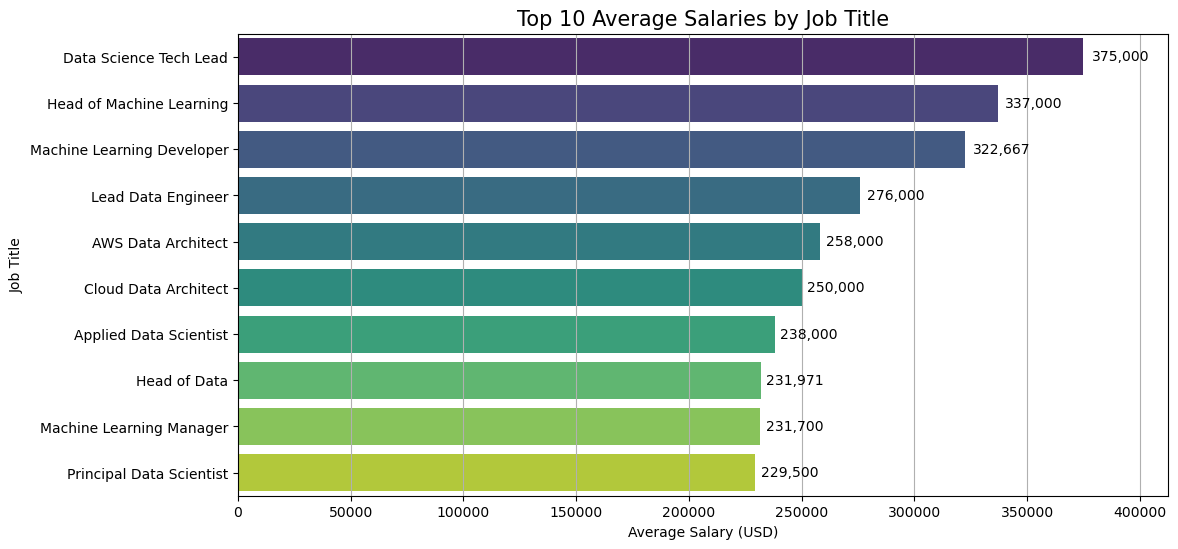

In [7]:
# Create a horizontal bar plot for the top 10 average salaries by job title
plt.figure(figsize=(12, 6))
sns.barplot(x='salary_in_usd', y='job_title', data=top_10_average_salary, palette='viridis')
plt.title('Top 10 Average Salaries by Job Title', fontsize=15)
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.xlim(0, top_10_average_salary['salary_in_usd'].max() * 1.1)  
plt.grid(axis='x')

# Display the salary values on the right side of each bar
for index, value in enumerate(top_10_average_salary['salary_in_usd']):
    plt.text(value* 1.01, index, f'{value:,.0f}', va='center')  
plt.show()

## **Insight**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>The results highlight the high market value of roles in Machine Learning, Data Science, and Data Engineering, with leadership positions earning even more. However, due to the concentration in management roles, we will focus on positions ranked 11th to 20th and the bottom 10 for a deeper analysis.</b>

In [8]:
# Selects the salaries for job titles ranked between 11th and 20th based on average salary
middle_average_salary = average_salary_by_title.iloc[10:20]
middle_average_salary

job_title  salary_in_usd  count
108                     Prompt Engineer     225695.562     16
0                          AI Architect     223190.385     26
98   Machine Learning Software Engineer     215622.222      9
115              Software Data Engineer     210000.000      1
34             Computer Vision Engineer     208231.448     29
33              Computational Biologist     205000.000      2
4                  AI Research Engineer     200000.000      1
46         Data Infrastructure Engineer     199467.708     24
114          Robotics Software Engineer     196500.000     10
97           Machine Learning Scientist     195482.112     98

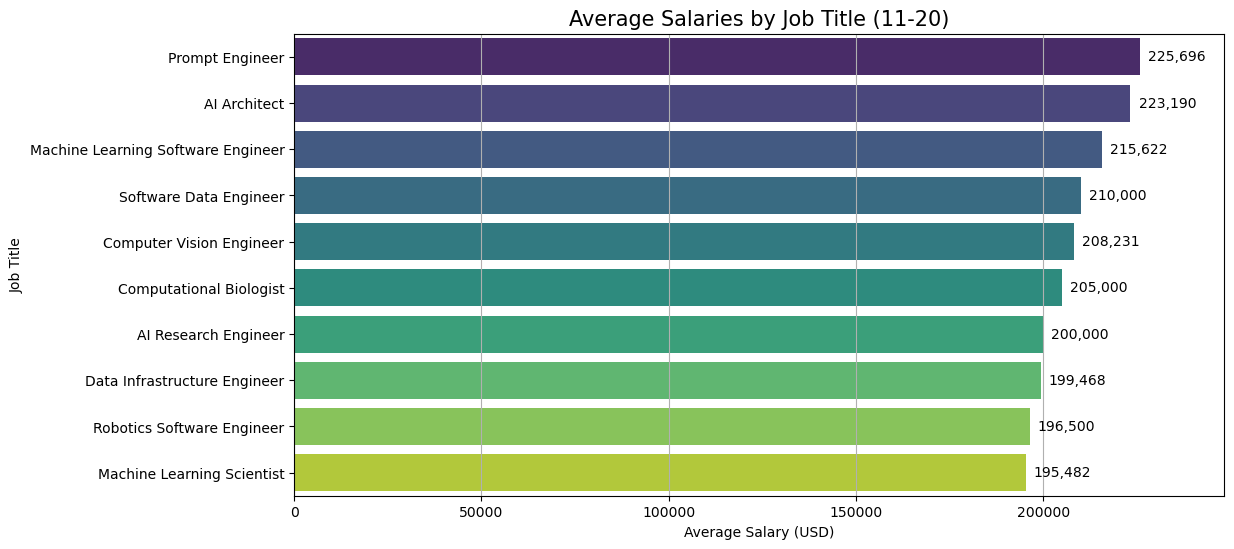

In [9]:
# Create a horizontal bar plot for job titles ranked between 11th and 20th based on average salary
plt.figure(figsize=(12, 6))
sns.barplot(x='salary_in_usd', y='job_title', data=middle_average_salary, palette='viridis')
plt.title('Average Salaries by Job Title (11-20)', fontsize=15)
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.xlim(0, middle_average_salary['salary_in_usd'].max() * 1.1)  
plt.grid(axis='x')

# Display the salary values on the right side of each bar
for index, value in enumerate(middle_average_salary['salary_in_usd']):
    plt.text(value* 1.01, index, f'{value:,.0f}', va='center')  
plt.show()

## **Insight**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Based on the report, we can see that most positions related to Engineering, AI, or Software have high market value, with salaries ranging between 195,482 and 225,696.</b>
</h4>

In [10]:
# Selects the average salaries for the bottom 10 job titles based on average salary
bottom_10_average_salary = average_salary_by_title.tail(10)
bottom_10_average_salary

job_title  salary_in_usd  count
101                  Master Data Specialist      83000.000      2
15                          BI Data Analyst      77500.000      4
82   Encounter Data Management Professional      72812.500      8
86                          Insight Analyst      72513.750      8
67                   Data Reporting Analyst      71664.833      6
35        Computer Vision Software Engineer      70000.000      1
20                        Big Data Engineer      70000.000      1
16                         BI Data Engineer      60000.000      1
32                  Compliance Data Analyst      60000.000      1
109           Quantitative Research Analyst      51000.000      1

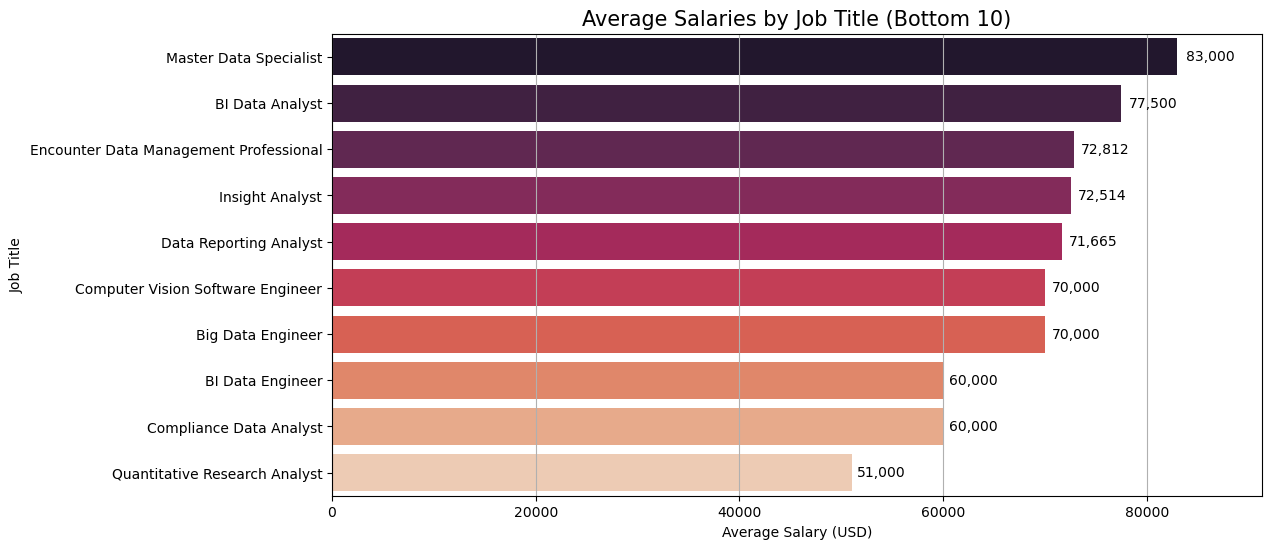

In [11]:
# Create a horizontal bar plot for the bottom 10 job titles based on average salary
plt.figure(figsize=(12, 6))
sns.barplot(x='salary_in_usd', y='job_title', data=bottom_10_average_salary, palette='rocket')
plt.title('Average Salaries by Job Title (Bottom 10)', fontsize=15)
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.xlim(0, bottom_10_average_salary['salary_in_usd'].max() * 1.1)  
plt.grid(axis='x')

# Display the salary values on the right side of each bar
for index, value in enumerate(bottom_10_average_salary['salary_in_usd']):
    plt.text(value* 1.01, index, f'{value:,.0f}', va='center')
plt.show()

## **Insight**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>In contrast, the second report shows that positions focused on BI or analysis tend to have lower salaries in the data field, ranging between 51,000 and 83,000.</b>
</h4>

## **RECAP**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>In summary, Engineering and AI-related positions in the US significantly surpass BI and analysis roles in terms of salary, with salaries reaching up to three times that of BI and analysis positions.</b>
</h4>

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Research limitations : Most of the data is quite sparse, which may limit the reliability of these results. Additional data points are needed for a more comprehensive understanding.</b>
</h4>

<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Q2: What trends can be observed in the fluctuations of average salaries in the US during the period from 2020 to 2024?</b>
</h4>

In [12]:
# Group the data by 'work_year' and calculate the mean of 'salary_in_usd' for each year
average_salary_per_year = data_US.groupby("work_year")["salary_in_usd"].mean().reset_index().round(0)

# Count the number of data points for each job title
data_points = data_US["work_year"].value_counts().reset_index()
data_points.columns = ["work_year", "count"]

# Merge the count with the average salary DataFrame
average_salary_per_year = average_salary_per_year.merge(data_points, on="work_year")

average_salary_per_year

work_year  salary_in_usd  count
0       2020       160555.0     28
1       2021       148185.0     86
2       2022       148967.0    821
3       2023       159360.0   3761
4       2024       158456.0   4132

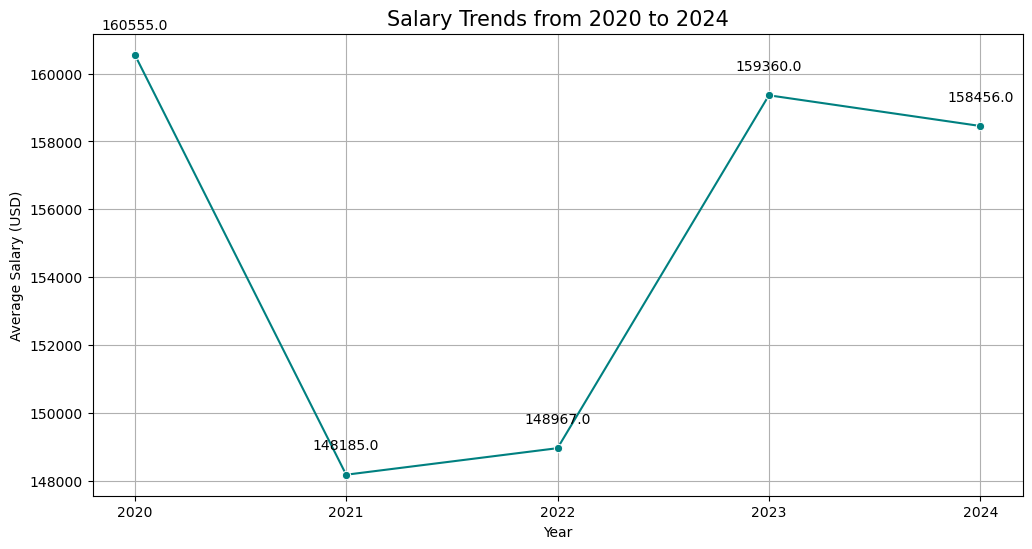

In [13]:
# Create a line plot for average salary per year
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=average_salary_per_year, marker='o', color='teal')
plt.title('Salary Trends from 2020 to 2024', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(average_salary_per_year['work_year'])  
plt.grid(True)

for i, row in average_salary_per_year.iterrows():
    plt.text(row['work_year'], row['salary_in_usd'] + 650, row['salary_in_usd'], 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## **Insight**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>From 2021 to 2023, the average annual salary increase was approximately $10,000, which is a significant rise. This likely reflects the growing demand for technology and the increasing importance of related skills. However, the average annual salary begins to decrease from 2023 to 2024.</b>
</h4>

## **Further Exploration**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Overall, according to the report, there has been notable growth in the US from 2021 to 2024. Next, we will conduct a one-sample t-test to further investigate whether salaries in 2021 are significantly different from those in 2024.</b>
</h4>

In [14]:
# Extract salary data for the year 2021 in the US
salaries_2021 = data_US[(data_US["work_year"] == 2021)]['salary_in_usd']

# Extract salary data for the year 2024 in the US 
salaries_2024 = data_US[(data_US["work_year"] == 2024)]['salary_in_usd']

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>First of all, we will remove outliers to avoid skewed results and enhance the accuracy and reliability of our findings.</b>
</h4>

In [15]:
# Removing outliers from the 2021 salary data
# Use the IQR method to detect outliers
Q1 = np.percentile(salaries_2021, 25)  # Calculate the first quartile (25th percentile)
Q3 = np.percentile(salaries_2021, 75)  # Calculate the third quartile (75th percentile)
IQR = Q3 - Q1  # Calculate the interquartile range (IQR)

# Calculate the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

# Remove outliers from the salary data
cleaned_salaries_2021 = salaries_2021[(salaries_2021 >= lower_bound) & (salaries_2021 <= upper_bound)]

In [16]:
# Removing outliers from the 2024 salary data
# Use the IQR method to detect outliers
Q1 = np.percentile(salaries_2024, 25) # Calculate the first quartile (25th percentile)
Q3 = np.percentile(salaries_2024, 75) # Calculate the third quartile (75th percentile)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

# Remove outliers from the salary data
cleaned_salaries_2024 = salaries_2024[(salaries_2024 >= lower_bound) & (salaries_2024 <= upper_bound)]

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>After removing outliers, we will use 2021 data, conduct a one-sample t-test, and utilizing 2024 data as a known mean. Next, the second step is to verify whether cleaned_salaries_2021 follows a Normal Distribution, which we will assess using a QQ plot.</b>
</h4>

## **Q-Q Plot Analysis**

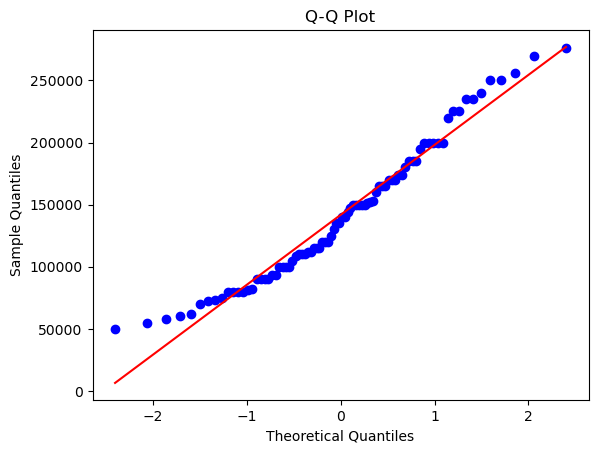

In [17]:
import scipy.stats as stats
stats.probplot(cleaned_salaries_2021, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

## **Q-Q Plot Report**
<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>According to the QQ plot, it shows that it's Right-Skewed data, meaning that the larger values are relatively sparse compared to the smaller values, resulting in the average being greater than the median. Therefore, we need to use the Box-Cox transformation to stabilize variance and make cleaned_salaries_2021 more normally distributed.</b>
</h4>

In [18]:
# Apply the Box-Cox transformation to the cleaned_salaries_2021
salaries_boxcox_2021, boxcox_lambda = stats.boxcox(cleaned_salaries_2021) 
print("Box-Cox transformed data:", salaries_boxcox_2021)
print("\n")
print("Boxcox lambda:", boxcox_lambda)

Box-Cox transformed data: [88.32156689 83.38238837 77.5031816  95.90620805 76.36645042 83.38238837
 94.84243182 81.00185746 70.10837232 92.61273393 72.43155671 74.57152178
 70.70840004 78.41751049 61.52169931 90.22817032 90.22817032 74.57152178
 86.29733421 83.38238837 63.17831021 95.90620805 70.10837232 79.30416838
 78.41751049 82.45222212 83.83721562 72.43155671 72.43155671 64.72733235
 97.94302667 76.55905645 81.81611641 86.29733421 70.10837232 74.57152178
 94.29824665 93.18373539 83.38238837 77.5031816  83.38238837 67.56007167
 98.53231205 86.84960779 73.09120868 72.43155671 86.29733421 85.5933533
 70.10837232 76.55905645 87.66072689 90.22817032 90.22817032 96.52949492
 76.55905645 68.22111483 88.32156689 76.94042876 64.1195847  74.57152178
 75.58274063 76.89777627 73.12377702 81.00185746 82.92080433 86.84960779
 70.35001978 89.60471861 93.18373539 78.41751049 90.22817032 84.87346434
 85.5933533  88.32156689 81.81611641 83.68634293 80.16505107 77.5031816
 94.29824665 68.86555994 65

## **Q-Q Plot Analysis After Box-Cox Transformation**

stats.probplot(salaries_boxcox_2021, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

## **Q-Q Plot Report**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>According to the QQ plot, after the Box-Cox transformation, the data exhibits a more normal distribution. Finally, we use the Shapiro-Wilk test to assess whether a sample data set comes from a normally distributed population.</b>
</h4>

## **Shapiro-Wilk Test**
   - #### **Null Hypothesis (H₀)**: The data comes from a normal distribution.  
   - #### **Alternative Hypothesis (H₁)**: The data does not come from a normal distribution.

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>If the p-value is greater than the significance level, we cannot reject the null hypothesis, suggesting that the data may conform to a normal distribution.</b>
</h4>

In [19]:
# Perform the Shapiro-Wilk test on the Box-Cox transformed salary data
stat, p_value = stats.shapiro(salaries_boxcox_2021)

# Print the test statistic and p-value
print(f'Statistic: {stat}')  # Output the test statistic
print(f'p-value: {p_value}')  # Output the p-value

# Set the significance level for the hypothesis test
alpha = 0.05  # Commonly used significance level

# Evaluate the result of the hypothesis test
if p_value > alpha:
    # If the p-value is greater than the significance level, we fail to reject the null hypothesis
    print("Data is approximately normally distributed (Fail to reject H0)")
else:
    # If the p-value is less than or equal to the significance level, we reject the null hypothesis
    print("Data is not normally distributed")

Statistic: 0.9821154833273373
p-value: 0.2950606293335974
Data is approximately normally distributed (Fail to reject H0)


## **Shapiro-Wilk Test Report**

- #### **Statistic**: 0.9821  
- #### **p-value**: 0.2951  
- #### **Based on the results, we conclude that : `Data is approximately normally distributed (Fail to reject H₀)`**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
  <b>Transform cleaned_salaries_2024 mean after Box-Cox transformation</b>
</h4>

In [20]:
transformed_mean = (cleaned_salaries_2024.mean()**boxcox_lambda - 1) / boxcox_lambda
print("Box-Cox transformed mean:", transformed_mean)

Box-Cox transformed mean: 83.80112334287622


<h4 style="font-size:18px; line-height:1.5; padding:5px;">
  <b>Finally, we will conduct a One-Sample T-Test to investigate whether salaries in the US in 2021 are significantly different from those in 2024.</b>
</h4>

In [21]:
# Perform a one-sample t-test comparing whether salaries in the US in 2021 are significantly different from those in 2024
t_statistic, p_value = stats.ttest_1samp(salaries_boxcox_2021, transformed_mean)

# A larger absolute value of t_statistic indicates a greater difference between the sample mean and the national average.
print("T-statistic:", t_statistic) 
print("P-value:", p_value)

# Set the significance level for the hypothesis test
alpha = 0.05  # Significance level

# Compare the p-value with the significance level to decide whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference")
else:
    print("Fail to reject the null hypothesis: No significant difference")

T-statistic: -3.060308347159951
P-value: 0.0029779273989840958
Reject the null hypothesis: Significant difference


## **One-Sample T-Test Report**

- #### **T-statistic**: -3.06
- #### **P-value**: 0.0029

## **RECAP**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>From 2021 to 2023, the average annual salary increase was approximately $10,000, while the average annual salary begins to decrease from 2023 to 2024. Overall, there is a significant difference between the salaries in the US from 2021 and those in 2024 statistically.</b>
</h4>

<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Q3: How do salaries vary across different locations?</b>
</h4>

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Select the top 5 locations with the highest average salary.</b>
</h4>

In [22]:
# Group the data by company location, calculate the average salary, and count the data points
average_salary_by_location = data.groupby("company_location").agg(
    salary_in_usd=("salary_in_usd", "mean"),
    count=("salary_in_usd", "count")
).reset_index()

# Round the average salary values to two decimal places for better readability
average_salary_by_location['salary_in_usd'] = average_salary_by_location['salary_in_usd'].round(2)

# Select the top 5 locations with the highest average salary in 2024
top_5_average_salary_by_location = average_salary_by_location.nlargest(5, 'salary_in_usd')
top_5_average_salary_by_location

company_location  salary_in_usd  count
64               QA      300000.00      1
37               IL      189772.25      4
62               PR      167500.00      4
74               US      157427.97   8879
57               NZ      146761.25      8

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Select the bottom 5 locations with the lowest average salary</b>
</h4>

In [23]:
bottom_5_average_salary_by_location = average_salary_by_location.nsmallest(5, 'salary_in_usd')
bottom_5_average_salary_by_location

company_location  salary_in_usd  count
21               EC       16000.00      1
49               MD       18000.00      1
32               HN       20000.00      1
71               TH       22971.33      3
72               TR       23094.67      6

## **Mapping dictionary**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>All of the location names are abbreviated, making them difficult to understand, so we will change them to their full names.</b>
</h4>

In [24]:
location_full_names = {
    'QA': 'Qatar',
    'IL': 'Israel',
    'PR': 'Puerto Rico',
    'US': 'United States',
    'NZ': 'New Zealand'
}

top_5_average_salary_by_location['company_location'] = top_5_average_salary_by_location['company_location'].replace(location_full_names)
top_5_average_salary_by_location

company_location  salary_in_usd  count
64            Qatar      300000.00      1
37           Israel      189772.25      4
62      Puerto Rico      167500.00      4
74    United States      157427.97   8879
57      New Zealand      146761.25      8

In [25]:
location_full_names = {
    'EC': 'Ecuador',
    'MD': 'Moldova',
    'HN': 'Honduras',
    'TH': 'Thailand',
    'TR': 'Turkey' 
}

bottom_5_average_salary_by_location['company_location'] = bottom_5_average_salary_by_location['company_location'].replace(location_full_names)
bottom_5_average_salary_by_location

company_location  salary_in_usd  count
21          Ecuador       16000.00      1
49          Moldova       18000.00      1
32         Honduras       20000.00      1
71         Thailand       22971.33      3
72           Turkey       23094.67      6

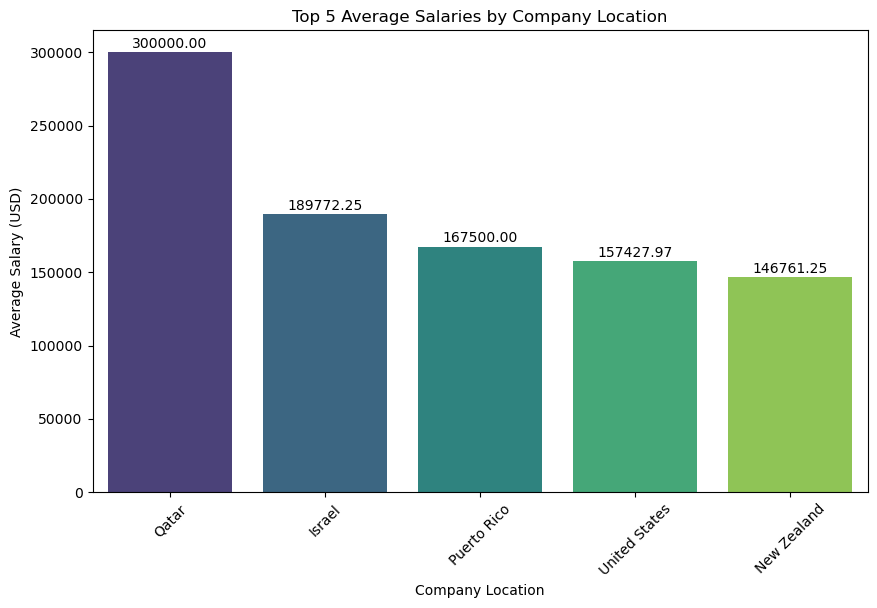

In [26]:
# Create a bar plot for the top 5 average salaries by company location
plt.figure(figsize=(10, 6))
sns.barplot(x='company_location', y='salary_in_usd', data=top_5_average_salary_by_location, palette='viridis')

# Set the title and axis labels for the plot
plt.title('Top 5 Average Salaries by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')

# Add text labels above each bar to display the salary values, with a slight offset for visibility
for index, value in enumerate(top_5_average_salary_by_location['salary_in_usd']):
    plt.text(index, value + 1000, f"{value:.2f}", ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.show()

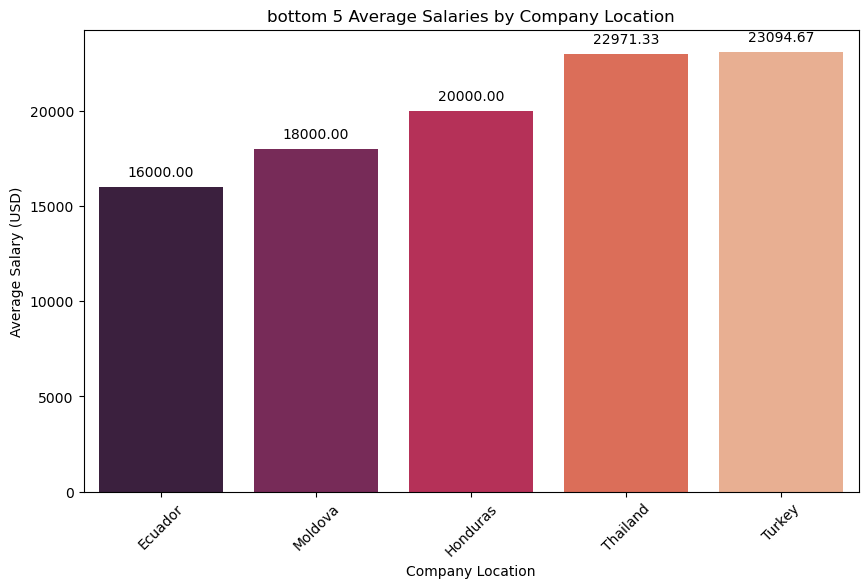

In [27]:
# Create a bar plot for the bottom 5 average salaries by company location
plt.figure(figsize=(10, 6))
sns.barplot(x='company_location', y='salary_in_usd', data=bottom_5_average_salary_by_location, palette='rocket')

# Set the title and axis labels for the plot
plt.title('bottom 5 Average Salaries by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')

# Add text labels above each bar to display the salary values, with a slight offset for visibility
for index, value in enumerate(bottom_5_average_salary_by_location['salary_in_usd']):
    plt.text(index, value + 400, f"{value:.2f}", ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.show()

## **Further Exploration**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Based on the report, we have identified the top 5 average salaries by company location and the bottom 5 average salaries by company location. Next, we will examine global average annual salary.</b>
</h4>

In [28]:
average_salary_by_location

company_location  salary_in_usd  count
0                AD       50745.00      1
1                AE       86000.00      5
2                AM       50000.00      1
3                AR       62444.44      9
4                AS       31684.33      3
..              ...            ...    ...
72               TR       23094.67      6
73               UA      105600.00     10
74               US      157427.97   8879
75               VN       68000.00      3
76               ZA       53053.38     16

[77 rows x 3 columns]

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Retrieve the full country name from the country code using the pycountry library</b>
</h4>

In [29]:
import pycountry

def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    # If the country code does not exist or is invalid, return the original country code
    except AttributeError:
        return country_code

average_salary_by_location["company_location"] = average_salary_by_location["company_location"].apply(country_code_to_name)
average_salary_by_location

company_location  salary_in_usd  count
0                Andorra       50745.00      1
1   United Arab Emirates       86000.00      5
2                Armenia       50000.00      1
3              Argentina       62444.44      9
4         American Samoa       31684.33      3
..                   ...            ...    ...
72               Türkiye       23094.67      6
73               Ukraine      105600.00     10
74         United States      157427.97   8879
75              Viet Nam       68000.00      3
76          South Africa       53053.38     16

[77 rows x 3 columns]

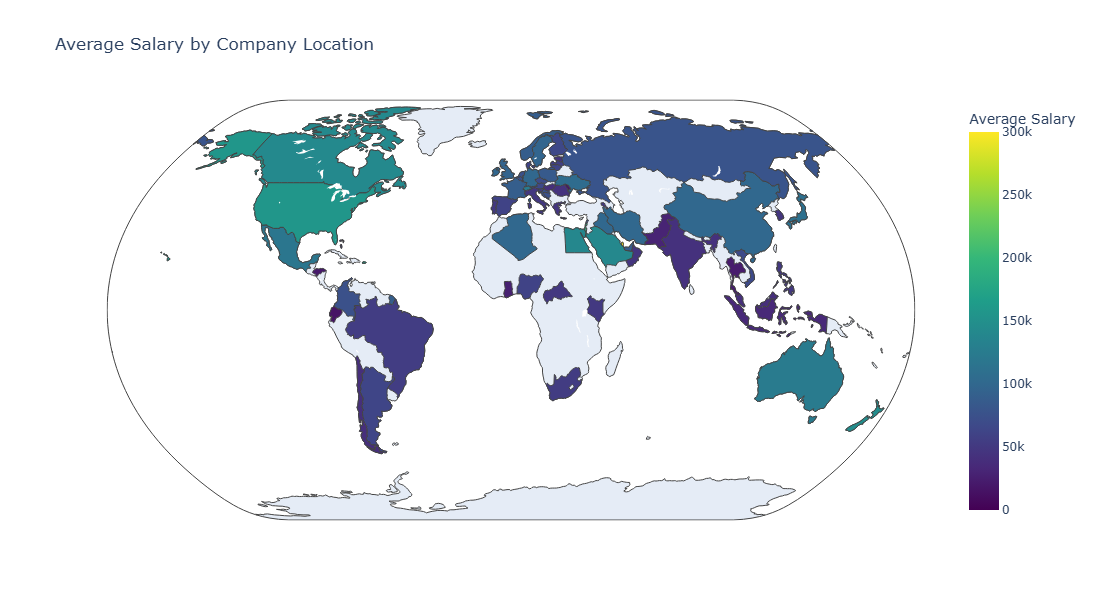

In [30]:
import plotly.express as px

# Create a choropleth map to visualize average salary by company location
fig2 = px.choropleth(
    average_salary_by_location,  
    locations='company_location',  # Column with country names for location mapping
    locationmode='country names',  # Use country names for location identification
    color='salary_in_usd',  # Column for color encoding based on salary
    hover_name='company_location',  
    color_continuous_scale=px.colors.sequential.Viridis,  
    title='Average Salary by Company Location',  
    labels={'salary_in_usd': 'Average Salary'},  # Label for the color scale
    projection='natural earth',  # Use a natural earth projection for the map
    width=1000,  
    height=600,  
    range_color=[0, 300000]  # Set the color range based on your salary data (adjust as needed)
)

fig2.show()

## **RECAP**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Overall, company locations in North America, specific regions in East Asia, and New Zealand have a favorable average annual salary of over 150k. In contrast, those in South America, Southeast Asia, and Russia have comparatively low annual salaries, falling below 100k.</b>
</h4>

<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Q4: What is the salary range for various experience levels in the United States in 2024?</b>
</h4>

In [31]:
# Filter for employee_residence in US and work_year in 2024
us_data = data[(data['employee_residence'] == 'US') & (data['work_year'] == 2024)]
us_data.head()

work_year        experience_level employment_type          job_title  \
1       2024                  Senior       Full-time       AI Developer   
2       2024                  Senior       Full-time       AI Developer   
3       2024  Mid/Intermediate level       Full-time     Data Scientist   
4       2024  Mid/Intermediate level       Full-time     Data Scientist   
5       2024                  Senior       Full-time  Research Engineer   

   salary salary_currency  salary_in_usd employee_residence remote_ratio  \
1  252000             USD         252000                 US      On-Site   
2  168000             USD         168000                 US      On-Site   
3  199500             USD         199500                 US  Full-Remote   
4   86700             USD          86700                 US  Full-Remote   
5  180000             USD         180000                 US      On-Site   

  company_location company_size  
1               US       MEDIUM  
2               US       MEDIUM  
3               US       MEDIUM  
4               US       MEDIUM  
5               US        SMALL

In [32]:
# Group by experience level and calculate average and median salaries
salary_summary = us_data.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median']).reset_index()

# Rename the columns for better clarity
salary_summary.columns = ['Experience Level', 'Average Salary (USD)', 'Median Salary (USD)']

# Display the summary
print(salary_summary)

         Experience Level  Average Salary (USD)  Median Salary (USD)
0             Entry level         106012.369610              94250.0
1         Executive level         212130.372549             205000.0
2  Mid/Intermediate level         142661.926011             131500.0
3                  Senior         175893.914718             165000.0


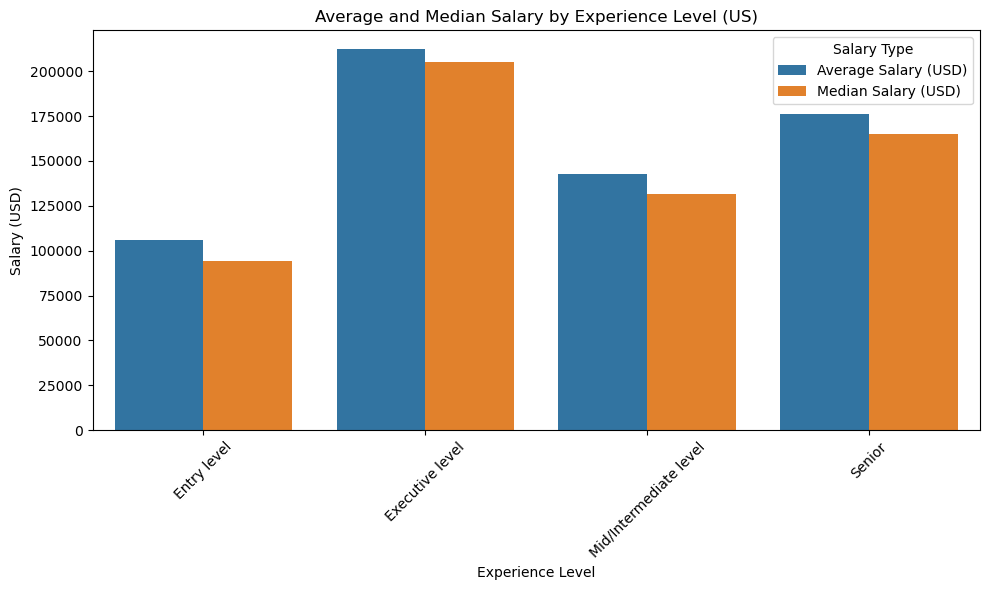

In [33]:
# Rename the columns for better clarity
salary_summary.columns = ['Experience Level', 'Average Salary (USD)', 'Median Salary (USD)']

# Melt the DataFrame for easier plotting
salary_melted = salary_summary.melt(id_vars='Experience Level', 
                                     value_vars=['Average Salary (USD)', 'Median Salary (USD)'], 
                                     var_name='Salary Type', 
                                     value_name='Salary')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_melted, x='Experience Level', y='Salary', hue='Salary Type')
plt.title('Average and Median Salary by Experience Level (US)')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Salary Type')
plt.tight_layout()
plt.show()

## **RECAP** 

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>There is a clear progression in salaries with increasing experience levels, with directors earning substantially more than junior, mid-level, and senior employees.</b>
</h4>

# **Conclusion**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Our analysis reveals that in the US, Engineering and AI-related positions command significantly higher salaries compared to BI and analysis roles, with some positions offering up to three times the salary of BI and analysis positions.</b>
</h4>

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>From 2021 to 2023, the average annual salary increased by approximately 10k per year, though this trend reversed in 2024, with salaries showing a slight decline. Statistically, there is a significant difference in salary levels between 2021 and 2024.</b>
</h4>

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Geographically, companies located in North America, certain regions in East Asia, and New Zealand offer favorable salaries, with average annual earnings exceeding 150k. In contrast, locations in South America, Southeast Asia, and Russia tend to have lower salary levels, with averages below 100k.</b>
</h4>

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Additionally, salary progression aligns closely with experience levels, with directors earning substantially more than junior, mid-level, and senior employees.</b>
</h4>

<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>After performing exploratory data analysis, we are going to build the Prediction Model, which will make this data more valuable.</b>
</h4>

# **Model Prediction**

In [34]:
data

work_year        experience_level employment_type  \
0           2024  Mid/Intermediate level       Full-time   
1           2024                  Senior       Full-time   
2           2024                  Senior       Full-time   
3           2024  Mid/Intermediate level       Full-time   
4           2024  Mid/Intermediate level       Full-time   
...          ...                     ...             ...   
18051       2020                  Senior       Full-time   
18052       2021  Mid/Intermediate level       Full-time   
18053       2020             Entry level       Full-time   
18054       2020             Entry level      Contractor   
18055       2021                  Senior       Full-time   

                      job_title   salary salary_currency  salary_in_usd  \
0            Analytics Engineer    77500             CAD          59615   
1                  AI Developer   252000             USD         252000   
2                  AI Developer   168000             USD         168000   
3                Data Scientist   199500             USD         199500   
4                Data Scientist    86700             USD          86700   
...                         ...      ...             ...            ...   
18051            Data Scientist   412000             USD         412000   
18052  Principal Data Scientist   151000             USD         151000   
18053            Data Scientist   105000             USD         105000   
18054     Business Data Analyst   100000             USD         100000   
18055            Data Scientist  7000000             INR          94665   

      employee_residence remote_ratio company_location company_size  
0                     CA  Full-Remote               CA        SMALL  
1                     US      On-Site               US       MEDIUM  
2                     US      On-Site               US       MEDIUM  
3                     US  Full-Remote               US       MEDIUM  
4                     US  Full-Remote               US       MEDIUM  
...                  ...          ...              ...          ...  
18051                 US  Full-Remote               US        LARGE  
18052                 US  Full-Remote               US        LARGE  
18053                 US  Full-Remote               US        SMALL  
18054                 US  Full-Remote               US        LARGE  
18055                 IN  Half-Remote               IN        LARGE  

[10676 rows x 11 columns]

## **Data cleaning**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>First of all, we will remove the columns that will not be utilized in the prediction process.</b>
</h4>

In [35]:
# Remove the columns that will not be utilized in the prediction process.
data = data.drop(columns=["work_year", "salary_currency", "salary", "employee_residence"])
data

experience_level employment_type                 job_title  \
0      Mid/Intermediate level       Full-time        Analytics Engineer   
1                      Senior       Full-time              AI Developer   
2                      Senior       Full-time              AI Developer   
3      Mid/Intermediate level       Full-time            Data Scientist   
4      Mid/Intermediate level       Full-time            Data Scientist   
...                       ...             ...                       ...   
18051                  Senior       Full-time            Data Scientist   
18052  Mid/Intermediate level       Full-time  Principal Data Scientist   
18053             Entry level       Full-time            Data Scientist   
18054             Entry level      Contractor     Business Data Analyst   
18055                  Senior       Full-time            Data Scientist   

       salary_in_usd remote_ratio company_location company_size  
0              59615  Full-Remote               CA        SMALL  
1             252000      On-Site               US       MEDIUM  
2             168000      On-Site               US       MEDIUM  
3             199500  Full-Remote               US       MEDIUM  
4              86700  Full-Remote               US       MEDIUM  
...              ...          ...              ...          ...  
18051         412000  Full-Remote               US        LARGE  
18052         151000  Full-Remote               US        LARGE  
18053         105000  Full-Remote               US        SMALL  
18054         100000  Full-Remote               US        LARGE  
18055          94665  Half-Remote               IN        LARGE  

[10676 rows x 7 columns]

## **Data Observation**

In [36]:
job_title_counts = data["job_title"].value_counts()
job_title_counts

job_title
Data Scientist                      2322
Data Engineer                       1949
Data Analyst                        1463
Machine Learning Engineer           1120
Research Scientist                   403
                                    ... 
Sales Data Analyst                     1
Data Analytics Associate               1
Applied Research Scientist             1
AI Software Development Engineer       1
BI Data Engineer                       1
Name: count, Length: 143, dtype: int64

In [37]:
filtered_job_titles = job_title_counts[job_title_counts >= 20]
print(filtered_job_titles)

job_title
Data Scientist                              2322
Data Engineer                               1949
Data Analyst                                1463
Machine Learning Engineer                   1120
Research Scientist                           403
Analytics Engineer                           365
Data Architect                               304
Research Engineer                            256
Business Intelligence Analyst                178
Applied Scientist                            163
AI Engineer                                  120
Data Manager                                 120
Research Analyst                             117
Machine Learning Scientist                   115
Business Intelligence Engineer               110
Business Intelligence                        105
Data Specialist                               84
BI Developer                                  66
Business Intelligence Developer               57
Data Analytics Manager                        54
Head of Da

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>After reviewing the data, we decided to use the job titles with the following job titles: Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer.</b>
</h4>

In [38]:
filtered_data = data[data["job_title"].isin(["Data Scientist", "Data Engineer", "Data Analyst", "Machine Learning Engineer"])]
filtered_data

experience_level employment_type       job_title  salary_in_usd  \
3      Mid/Intermediate level       Full-time  Data Scientist         199500   
4      Mid/Intermediate level       Full-time  Data Scientist          86700   
9                      Senior       Full-time  Data Scientist         304000   
10                     Senior       Full-time  Data Scientist         190000   
11                     Senior       Full-time  Data Scientist         137000   
...                       ...             ...             ...            ...   
18047  Mid/Intermediate level       Full-time  Data Scientist         119059   
18049  Mid/Intermediate level       Full-time   Data Engineer          28369   
18051                  Senior       Full-time  Data Scientist         412000   
18053             Entry level       Full-time  Data Scientist         105000   
18055                  Senior       Full-time  Data Scientist          94665   

      remote_ratio company_location company_size  
3      Full-Remote               US       MEDIUM  
4      Full-Remote               US       MEDIUM  
9          On-Site               US       MEDIUM  
10         On-Site               US       MEDIUM  
11         On-Site               US       MEDIUM  
...            ...              ...          ...  
18047  Full-Remote               IL       MEDIUM  
18049  Half-Remote               MT        LARGE  
18051  Full-Remote               US        LARGE  
18053  Full-Remote               US        SMALL  
18055  Half-Remote               IN        LARGE  

[6854 rows x 7 columns]

<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Now, we can start to predict salary_in_usd.</b>
</h4>

# **CatBoostRegressor model**

In [39]:
filtered_data_cat = filtered_data.copy()
filtered_data_cat

experience_level employment_type       job_title  salary_in_usd  \
3      Mid/Intermediate level       Full-time  Data Scientist         199500   
4      Mid/Intermediate level       Full-time  Data Scientist          86700   
9                      Senior       Full-time  Data Scientist         304000   
10                     Senior       Full-time  Data Scientist         190000   
11                     Senior       Full-time  Data Scientist         137000   
...                       ...             ...             ...            ...   
18047  Mid/Intermediate level       Full-time  Data Scientist         119059   
18049  Mid/Intermediate level       Full-time   Data Engineer          28369   
18051                  Senior       Full-time  Data Scientist         412000   
18053             Entry level       Full-time  Data Scientist         105000   
18055                  Senior       Full-time  Data Scientist          94665   

      remote_ratio company_location company_size  
3      Full-Remote               US       MEDIUM  
4      Full-Remote               US       MEDIUM  
9          On-Site               US       MEDIUM  
10         On-Site               US       MEDIUM  
11         On-Site               US       MEDIUM  
...            ...              ...          ...  
18047  Full-Remote               IL       MEDIUM  
18049  Half-Remote               MT        LARGE  
18051  Full-Remote               US        LARGE  
18053  Full-Remote               US        SMALL  
18055  Half-Remote               IN        LARGE  

[6854 rows x 7 columns]

## **Data Pre-Processing**

In [40]:
X = filtered_data_cat.drop("salary_in_usd", axis=1)
y = filtered_data_cat["salary_in_usd"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>After completing Data Pre-Processing, we are now ready to build the Prediction Model.</b>
</h4>

## **Modeling**

In [41]:
from catboost import CatBoostRegressor, Pool
cat_features = ['experience_level', 'employment_type', 'job_title','remote_ratio', 'company_location', 'company_size']
model = CatBoostRegressor(iterations=500, depth=10, learning_rate=0.05, loss_function='RMSE', random_seed=42, cat_features=cat_features)
model.fit(X_train, y_train)

0:	learn: 70401.2458780	total: 220ms	remaining: 1m 49s
1:	learn: 69636.6040573	total: 303ms	remaining: 1m 15s
2:	learn: 68986.7957869	total: 356ms	remaining: 59s
3:	learn: 68196.8194162	total: 390ms	remaining: 48.4s
4:	learn: 67437.8364082	total: 445ms	remaining: 44.1s
5:	learn: 66747.3192113	total: 485ms	remaining: 40s
6:	learn: 66032.9861833	total: 568ms	remaining: 40s
7:	learn: 65418.0190218	total: 608ms	remaining: 37.4s
8:	learn: 64835.8636969	total: 689ms	remaining: 37.6s
9:	learn: 64305.3260550	total: 728ms	remaining: 35.7s
10:	learn: 63796.5561006	total: 805ms	remaining: 35.8s
11:	learn: 63343.3505425	total: 886ms	remaining: 36s
12:	learn: 62941.8238785	total: 952ms	remaining: 35.7s
13:	learn: 62580.8896802	total: 1.01s	remaining: 35s
14:	learn: 62235.3386943	total: 1.09s	remaining: 35.3s
15:	learn: 61889.6774707	total: 1.18s	remaining: 35.8s
16:	learn: 61593.2287558	total: 1.26s	remaining: 35.8s
17:	learn: 61302.8282393	total: 1.35s	remaining: 36.1s
18:	learn: 61066.7909574	tot

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred_catboost = model.predict(X_test)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)
print(f'Mean Squared Error (CatBoost): {mse_catboost}')
print(f'R-squared (CatBoost): {r2_catboost}')

Mean Squared Error (CatBoost): 2822380509.4538903
R-squared (CatBoost): 0.325655849192527


<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Next, we will use SHAP to interpret how individual features influence the output of CatBoost model.</b>
</h4>

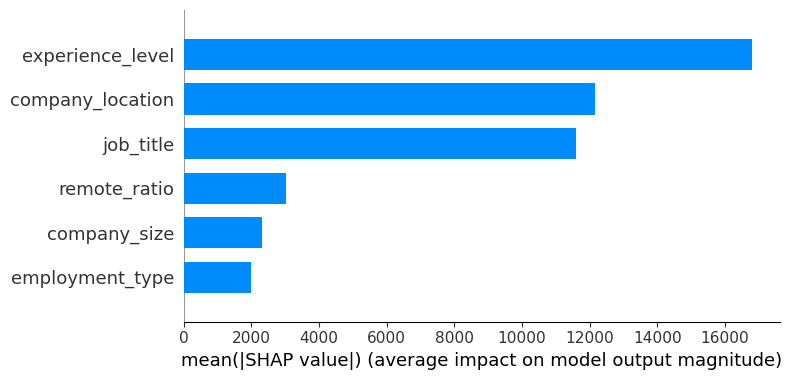

In [43]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)

## **Insight**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>The report shows that experience level, company location, and job title are the key factors influencing salary, while remote work ratio, company size, and employment type have minimal impact.</b>
</h4>

# **RandomForestRegressor model**

In [44]:
filtered_data_cat

experience_level employment_type       job_title  salary_in_usd  \
3      Mid/Intermediate level       Full-time  Data Scientist         199500   
4      Mid/Intermediate level       Full-time  Data Scientist          86700   
9                      Senior       Full-time  Data Scientist         304000   
10                     Senior       Full-time  Data Scientist         190000   
11                     Senior       Full-time  Data Scientist         137000   
...                       ...             ...             ...            ...   
18047  Mid/Intermediate level       Full-time  Data Scientist         119059   
18049  Mid/Intermediate level       Full-time   Data Engineer          28369   
18051                  Senior       Full-time  Data Scientist         412000   
18053             Entry level       Full-time  Data Scientist         105000   
18055                  Senior       Full-time  Data Scientist          94665   

      remote_ratio company_location company_size  
3      Full-Remote               US       MEDIUM  
4      Full-Remote               US       MEDIUM  
9          On-Site               US       MEDIUM  
10         On-Site               US       MEDIUM  
11         On-Site               US       MEDIUM  
...            ...              ...          ...  
18047  Full-Remote               IL       MEDIUM  
18049  Half-Remote               MT        LARGE  
18051  Full-Remote               US        LARGE  
18053  Full-Remote               US        SMALL  
18055  Half-Remote               IN        LARGE  

[6854 rows x 7 columns]

## **Data Pre-Processing**

In [45]:
x = filtered_data_cat.iloc[:, [0, 1, 2, 4, 5, 6]].values
y = filtered_data_cat.iloc[:, 3].values

print("Features (x):")
print(x)
print("\n")
print("Target (y):")
print(y)

Features (x):
[['Mid/Intermediate level' 'Full-time' 'Data Scientist' 'Full-Remote'
  'US' 'MEDIUM']
 ['Mid/Intermediate level' 'Full-time' 'Data Scientist' 'Full-Remote'
  'US' 'MEDIUM']
 ['Senior' 'Full-time' 'Data Scientist' 'On-Site' 'US' 'MEDIUM']
 ...
 ['Senior' 'Full-time' 'Data Scientist' 'Full-Remote' 'US' 'LARGE']
 ['Entry level' 'Full-time' 'Data Scientist' 'Full-Remote' 'US' 'SMALL']
 ['Senior' 'Full-time' 'Data Scientist' 'Half-Remote' 'IN' 'LARGE']]


Target (y):
[199500  86700 304000 ... 412000 105000  94665]


<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Convert categorical labels into a numerical form</b>
</h4>

In [46]:
columns_x = ['experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_location', 'company_size']
df_x = pd.DataFrame(x, columns=columns_x)
x = pd.get_dummies(df_x, drop_first=True).astype(int)    
x = x.to_numpy() 

columns_y = ['salary_level']
df_y = pd.DataFrame(y, columns=columns_y)
y = pd.get_dummies(df_y, drop_first=True).astype(int)   

print("Shape (x):")
print(x.shape)
print("\n")
print("Features (x):")
print(x)
print("\n")
print("Target (y):")
print(y)

Shape (x):
(6854, 72)


Features (x):
[[0 1 0 ... 0 1 0]
 [0 1 0 ... 0 1 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]]


Target (y):
      salary_level
0           199500
1            86700
2           304000
3           190000
4           137000
...            ...
6849        119059
6850         28369
6851        412000
6852        105000
6853         94665

[6854 rows x 1 columns]


<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Split the data into training and testing sets</b>
</h4>

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>After completing Data Pre-Processing, we are now ready to build the Prediction Model.</b>
</h4>

## **Modeling**

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=0)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt']
}

# Performing the grid search
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best RandomForestRegressor model after running the grid search
best_rfr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions
predictions = best_rfr.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## **Model Evaluation**

In [49]:
# Evaluate model performance
mse = mean_squared_error(y_test, predictions) 
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 3472156345.2180576
R² Score: 0.3173746301813726


<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Next, we will use SHAP to interpret how individual features influence the output of RandomForest model.</b>
</h4>

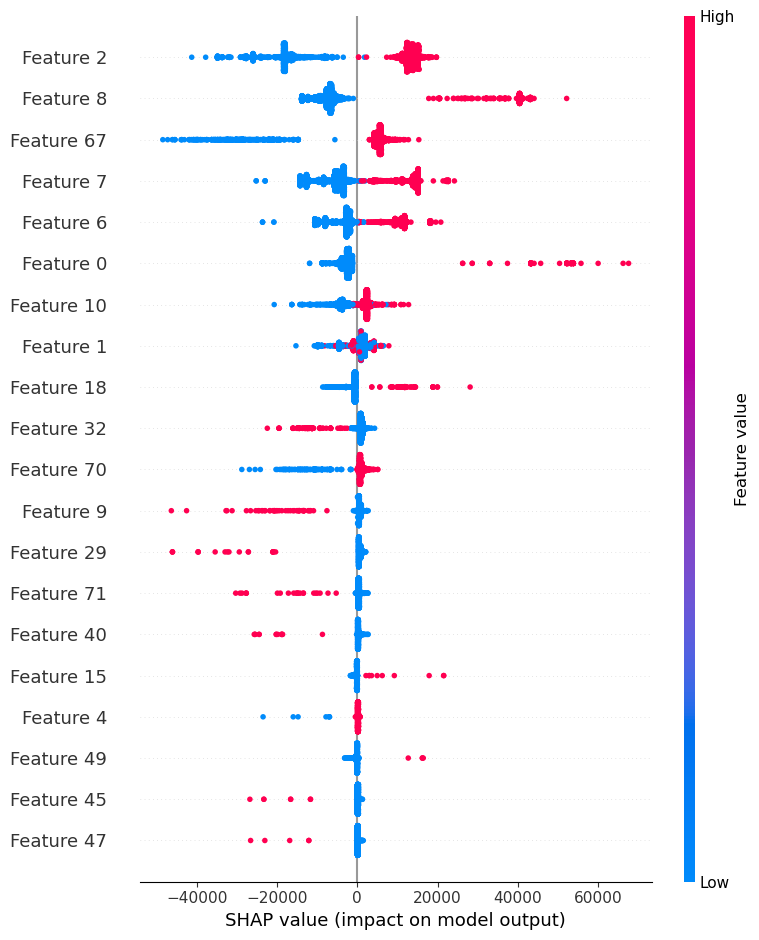

In [50]:
# Use TreeExplainer to explain the RandomForest model
explainer = shap.TreeExplainer(best_rfr)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot to show feature contributions
shap.summary_plot(shap_values, X_test)

# **ANN model**

## **Build the Prediction Model**

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Construct the ANN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),    
    Dropout(0.2),                    
    Dense(1)                         
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model training
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1) 

# Make predictions
predictions = model.predict(X_test)

Epoch 1/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 26331848704.0000
Epoch 2/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25913403392.0000
Epoch 3/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24301400064.0000
Epoch 4/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21242679296.0000
Epoch 5/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16189070336.0000
Epoch 6/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11066583040.0000
Epoch 7/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6376200704.0000
Epoch 8/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4864609792.0000
Epoch 9/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4321176064.0000
Epoch 10/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4568672256.0000
Epoch 11/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4276858624.0000  
Epoch 12/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 3876745984.0000
Epoch 13/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3

## **Model Evaluation**

In [52]:
# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 3503961088.0
R² Score: 0.3111218810081482


# **Summary**

### **CatBoostRegressor Model**

- #### **Mean Squared Error (MSE)**: 2822380509
- #### **R² Score**: 0.33

### **RandomForestRegressor Model**

- #### **Mean Squared Error (MSE)**: 3472156345
- #### **R² Score**: 0.32

### **ANN Model**

- #### **Mean Squared Error (MSE)**: 3509813760
- #### **R² Score**: 0.31

# **RECAP** 

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>The performance of the CatBoostRegressor, RandomForestRegressor and ANN model has been suboptimal. So, we plan to classify the target variable (salary) and use a classification model instead of a regression model. </b>
</h4>

# **Data Observation**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>First, we need to observe the distribution of salary to determine how many levels to classify. </b>
</h4>

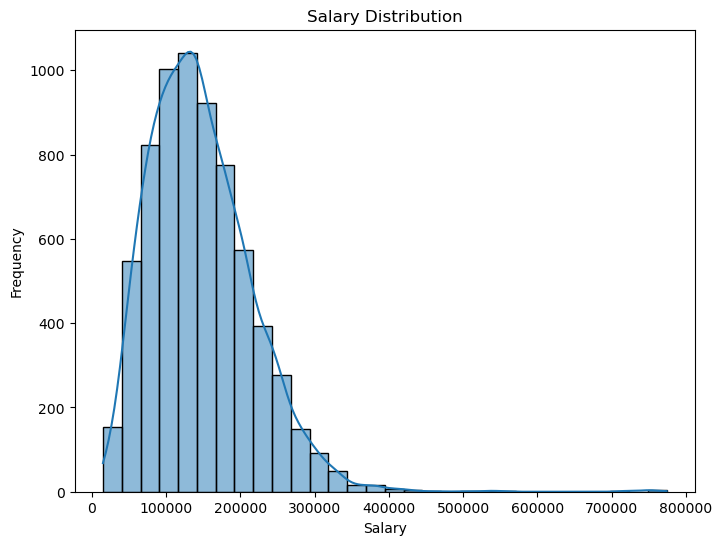

In [53]:
# Histogram and KDE plot to observe distribution
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data["salary_in_usd"], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

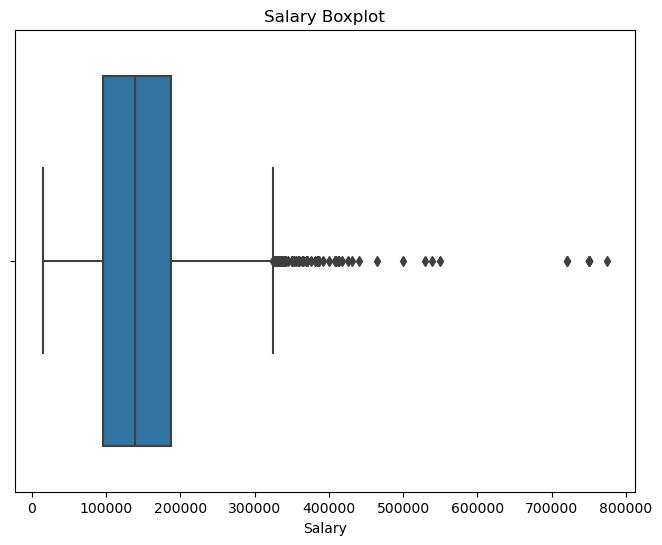

In [54]:
# Creating the boxplot to observe the distribution and outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_data["salary_in_usd"])
plt.title('Salary Boxplot')
plt.xlabel('Salary')
plt.show()

In [55]:
# Summary statistics for the salary data
salary_summary = filtered_data["salary_in_usd"].describe(percentiles=[.25, .5, .75])
print(salary_summary)

count      6854.000000
mean     146737.939743
std       70000.261838
min       15000.000000
25%       95325.000000
50%      138555.000000
75%      187000.000000
max      774000.000000
Name: salary_in_usd, dtype: float64


## **Insight**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>After reviewing the data, we observed that the salary distribution is right-skewed, indicating that the average salary is higher than the median. To address this, we will first remove the outliers.</b>
</h4>

In [56]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = salary_summary['25%']  # First quartile
Q3 = salary_summary['75%']  # Third quartile
IQR = Q3 - Q1  # Interquartile Range

# Step 2: Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the data to remove outliers
filtered_data = filtered_data[(filtered_data["salary_in_usd"] >= lower_bound) & (filtered_data["salary_in_usd"] <= upper_bound)]

# Check the shape of the new DataFrame
print("Data Shape after Removing Outliers:", filtered_data.shape)

# Summary statistics of the cleaned data
salary_summary_no_outliers = filtered_data["salary_in_usd"].describe(percentiles=[.25, .5, .75])
print(salary_summary_no_outliers)

Data Shape after Removing Outliers: (6770, 7)
count      6770.000000
mean     143576.958789
std       63125.327396
min       15000.000000
25%       95000.000000
50%      137450.000000
75%      185000.000000
max      324100.000000
Name: salary_in_usd, dtype: float64


<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Observe the Distribution again</b>
</h4>

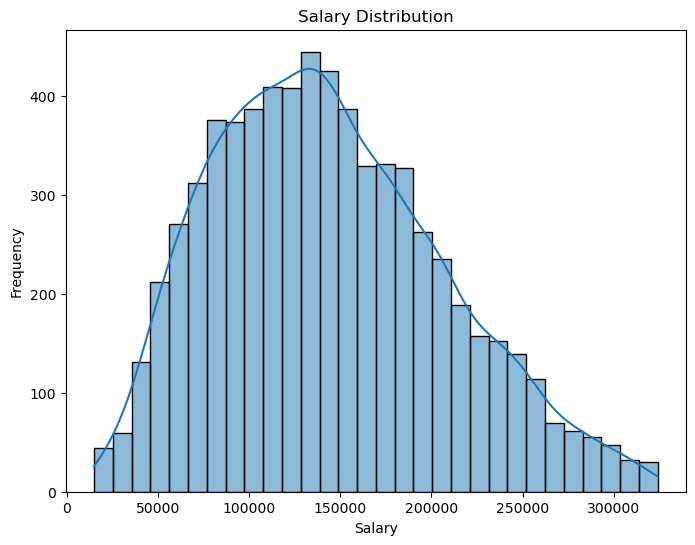

In [57]:
# Histogram and KDE plot to observe distribution
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data["salary_in_usd"], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Next, we will classify the target variable (salary)</b>
</h4>

In [58]:
# Function to categorize salary
def categorize_salary(salary):
    if salary <= 96978:
        return 'Lv1'
    elif 103200 < salary <= 139810:
        return 'Lv2'
    elif 140000 < salary <= 186000:
        return 'Lv3'
    else:
        return 'Lv4'

# Apply the function to the salary column
filtered_data.loc[:, 'salary_level'] = filtered_data['salary_in_usd'].apply(categorize_salary)
filtered_data

C:\Users\hankc\AppData\Local\Temp\ipykernel_15988\3985891877.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



experience_level employment_type       job_title  salary_in_usd  \
3      Mid/Intermediate level       Full-time  Data Scientist         199500   
4      Mid/Intermediate level       Full-time  Data Scientist          86700   
9                      Senior       Full-time  Data Scientist         304000   
10                     Senior       Full-time  Data Scientist         190000   
11                     Senior       Full-time  Data Scientist         137000   
...                       ...             ...             ...            ...   
18046                  Senior       Full-time  Data Scientist         168000   
18047  Mid/Intermediate level       Full-time  Data Scientist         119059   
18049  Mid/Intermediate level       Full-time   Data Engineer          28369   
18053             Entry level       Full-time  Data Scientist         105000   
18055                  Senior       Full-time  Data Scientist          94665   

      remote_ratio company_location company_size salary_level  
3      Full-Remote               US       MEDIUM          Lv4  
4      Full-Remote               US       MEDIUM          Lv1  
9          On-Site               US       MEDIUM          Lv4  
10         On-Site               US       MEDIUM          Lv4  
11         On-Site               US       MEDIUM          Lv2  
...            ...              ...          ...          ...  
18046      On-Site               JP        SMALL          Lv3  
18047  Full-Remote               IL       MEDIUM          Lv2  
18049  Half-Remote               MT        LARGE          Lv1  
18053  Full-Remote               US        SMALL          Lv2  
18055  Half-Remote               IN        LARGE          Lv1  

[6770 rows x 8 columns]

<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>After, data observation and data cleaning. Now, we can start to predict salary_in_usd.</b>
</h4>

# **CatBoostClassifier model**

## **Data Pre-Processing**

In [59]:
X = filtered_data.drop(["salary_level", "salary_in_usd"], axis=1)
y = filtered_data["salary_level"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>After completing Data Pre-Processing, we are now ready to build the Prediction Model.</b>
</h4>

In [60]:
from catboost import CatBoostClassifier
# Define categorical features
cat_features = ['experience_level', 'employment_type', 'job_title','remote_ratio', 'company_location', 'company_size']

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass', verbose=False)

# Train the model on the full training set
model.fit(X_train, y_train, cat_features=cat_features)
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\n")
# Print classification report (precision, recall, F1-score)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print("\n")
# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.4660


Classification Report:
              precision    recall  f1-score   support

         Lv1       0.57      0.70      0.63       322
         Lv2       0.39      0.16      0.23       313
         Lv3       0.20      0.09      0.12       299
         Lv4       0.47      0.78      0.59       420

    accuracy                           0.47      1354
   macro avg       0.41      0.43      0.39      1354
weighted avg       0.42      0.47      0.41      1354



Confusion Matrix:
[[227  33  26  36]
 [ 81  50  37 145]
 [ 55  28  26 190]
 [ 32  17  43 328]]


# **RandomForestClassifier model**

## **Data Pre-Processing**

In [62]:
x = filtered_data.iloc[:, [0, 1, 2, 4, 5, 6]].values
y = filtered_data.iloc[:, 7].values

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Convert categorical labels into a numerical form</b>
</h4>

In [63]:
columns_x = ['experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_location', 'company_size']
df_x = pd.DataFrame(x, columns=columns_x)
x = pd.get_dummies(df_x, drop_first=True).astype(int)    
x = x.to_numpy() 

columns_y = ['salary_level']
df_y = pd.DataFrame(y, columns=columns_y)
y = pd.get_dummies(df_y, drop_first=True).astype(int)   

print("Shape (x):")
print(x.shape)
print("\n")
print("Features (x):")
print(x)
print("\n")
print("Target (y):")
print(y)

Shape (x):
(6770, 72)


Features (x):
[[0 1 0 ... 0 1 0]
 [0 1 0 ... 0 1 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]]


Target (y):
      salary_level_Lv2  salary_level_Lv3  salary_level_Lv4
0                    0                 0                 1
1                    0                 0                 0
2                    0                 0                 1
3                    0                 0                 1
4                    1                 0                 0
...                ...               ...               ...
6765                 0                 1                 0
6766                 1                 0                 0
6767                 0                 0                 0
6768                 1                 0                 0
6769                 0                 0                 0

[6770 rows x 3 columns]


<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Split the data into training and testing sets</b>
</h4>

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>After completing Data Pre-Processing, we are now ready to build the Prediction Model.</b>
</h4>

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider at each split
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Best parameters found by GridSearchCV
print("Best Parameters:", best_params)

# Use the best estimator to predict
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
169 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hankc\anaconda3\Lib\site-pack

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


## **Model Evaluation**

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\n")
# Print classification report (precision, recall, F1-score)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.3264


Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.01      0.02       441
           1       0.00      0.00      0.00       506
           2       0.56      0.25      0.35       551

   micro avg       0.54      0.09      0.16      1498
   macro avg       0.27      0.09      0.12      1498
weighted avg       0.28      0.09      0.13      1498
 samples avg       0.07      0.07      0.07      1498



C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.

C:\Users\hankc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.



# **Summary**

### **CatBoostClassifier Model**

- #### **Test Accuracy**: 0.47

### **RandomForestClassifier Model**

- #### **Test Accuracy**: 0.33

# **Conclusion**

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>In our modeling process, we employed five machine learning models: CatBoostRegressor, RandomForestRegressor, Artificial Neural Network (ANN), CatBoostClassifier, and RandomForestClassifier. Among these, the CatBoostClassifier demonstrated the best performance. The model achieved a classification accuracy of 47%, which, while marginally better than random guessing (25% for a four-class classification problem), highlights the need for further optimization.</b>
</h4>

<h4 style="font-size:18px; line-height:1.5; padding:5px;">
<b>Despite its superior performance relative to other models, the CatBoostClassifier's results suggest there is still significant room for improvement. To enhance the model’s predictive power, we recommend exploring additional features or acquiring more data to improve the model’s ability to generalize effectively.</b>
</h4>